# CyCIF PYTHON PIPELINE

# I. QC/EDA NOTEBOOK

## I.1. PACKAGES IMPORT

In [3]:
import warnings
import os
import plotly as plt
import seaborn as sb

from my_modules import *

In [4]:
#Silence FutureWarnings & UserWarnings
warnings.filterwarnings('ignore', category= FutureWarning)
warnings.filterwarnings('ignore', category= UserWarning)

## I.2. *DIRECTORIES

In [5]:
# Set base directory

directorio_actual = os.getcwd()
print(directorio_actual)

##### MAC WORKSTATION #####
#base_dir = r'/Volumes/LaboLabrie/Projets/OC_TMA_Pejovic/Temp/Zoe/CyCIF_pipeline/'
###########################

##### WINDOWS WORKSTATION #####
#base_dir = r'C:\Users\LaboLabrie\gerz2701\cyCIF-pipeline\Set_B'
###############################

##### LOCAL WORKSTATION #####
base_dir = r'/Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/'
#############################

#set_name = 'Set_A'
set_name = 'test'

/Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431


In [6]:
project_name = set_name              # Project name
step_suffix = 'qc_eda'               # Curent part (here part I)
previous_step_suffix_long = ""       # Previous part (here empty)

# Initial input data directory
input_data_dir = os.path.join(base_dir, project_name + "_data")

# QC/EDA output directories
# global output
output_data_dir = os.path.join(base_dir, project_name + "_" + step_suffix)
# images subdirectory
output_images_dir = os.path.join(output_data_dir,"images")

# Data and Metadata directories
# global data
metadata_dir = os.path.join(base_dir, project_name + "_metadata")
# images subdirectory
metadata_images_dir = os.path.join(metadata_dir,"images")

# Create directories if they don't already exist
for d in [base_dir, input_data_dir, output_data_dir, output_images_dir, metadata_dir, metadata_images_dir]:
    if not os.path.exists(d):
        print("Creation of the" , d, "directory...")
        os.makedirs(d)
    else :
        print("The", d, "directory already exists !")

os.chdir(input_data_dir)

The /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/ directory already exists !
The /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_data directory already exists !
The /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda directory already exists !
The /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda/images directory already exists !
The /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_metadata directory already exists !
The /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_metadata/images directory already exists !


In [7]:
# Verify paths
print('base_dir :', base_dir)
print('input_data_dir :', input_data_dir)
print('output_data_dir :', output_data_dir)
print('output_images_dir :', output_images_dir)
print('metadata_dir :', metadata_dir)
print('metadata_images_dir :', metadata_images_dir)

base_dir : /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/
input_data_dir : /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_data
output_data_dir : /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda
output_images_dir : /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda/images
metadata_dir : /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_metadata
metadata_images_dir : /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_metadata/images


## I.3. FILES

In [8]:
# Listing all the .csv files in the metadata/data directory
# Don't forget to move the csv files into the proj_data directory
# if the data dir is empty it's not going to work 
ls_samples = [sample for sample in os.listdir(input_data_dir) if sample.endswith(".csv")]

print("The following CSV files were detected:\n\n",[sample for sample in ls_samples], "\n\nin", input_data_dir, "directory.")

#print(ls_samples[0])

The following CSV files were detected:

 ['DD3S1.csv', 'DD3S2.csv', 'DD3S3.csv', 'TMA.csv'] 

in /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_data directory.


In [9]:
# First gather information on expected headers using first file in ls_samples
# Read in the first row of the file corresponding to the first sample (index = 0) in ls_samples
df = pd.read_csv(os.path.join(input_data_dir, ls_samples[0]) , index_col = 0, nrows = 1)


# Make sure the file was imported correctly
print("df :\n", df.head(), "\n")
print("df's columns :\n", df.columns, "\n")
print("df's index :\n", df.index, "\n")
print("df's index name :\n", df.index.name)

df :
          Cell Size        Nuc X     Nuc Y Inv  ROI index  Nucleus Size  \
Cell Id                                                                  
1@1            339  1484.771729  16632.205078          0           127   

         Nucleus Roundness  AF488 Cell Intensity Average  \
Cell Id                                                    
1@1                0.95504                   2385.867188   

         AF488 Cytoplasm Intensity Average  AF488 Nucleus Intensity Average  \
Cell Id                                                                       
1@1                              2356.6604                       2434.62207   

         AF555 Cell Intensity Average  ...  r7c2 Nucleus Intensity Average  \
Cell Id                                ...                                   
1@1                       1358.528076  ...                      290.582672   

         r8c2 Cell Intensity Average  r8c2 Cytoplasm Intensity Average  \
Cell Id                                    

In [10]:
# Verify that the ID column in input file became the index
# Verify that the index name column is "ID", if not, rename it
if df.index.name != "ID":
    print("Expected the first column in input file (index_col = 0) to be 'ID'. \n"
          "This column will be used to set the index names (cell number for each sample). \n"
          "It appears that the column '" + df.index.name + "' was actually the imported as the index column.")
    #df.index.name = 'ID'
    print("A new index name (first column) will be given ('ID') to replace the current one '" + df.index.name + "'\n")

# Apply the changes to the headers as specified with apply_header_changes() function (in my_modules.py)
# Apply the changes to the dataframe rows as specified with apply_df_changes() function (in my_modules.py)
df = apply_header_changes(df)
df = apply_df_changes(df)

# Set variable to hold default header values
expected_headers = df.columns.values
print(expected_headers)

# Make sure the file is now formated correctly
print("\ndf :\n", df.head(), "\n")
print("df's columns :\n", df.columns, "\n")
print("df's index :\n", df.index, "\n")
print("df's index name :\n", df.index.name)

Expected the first column in input file (index_col = 0) to be 'ID'. 
This column will be used to set the index names (cell number for each sample). 
It appears that the column 'Cell Id' was actually the imported as the index column.
A new index name (first column) will be given ('ID') to replace the current one 'Cell Id'

['Cell_Size' 'Nuc_X' 'Nuc_Y_Inv' 'ROI_index' 'Nucleus_Size'
 'Nucleus_Roundness' 'AF488_Cell_Intensity_Average'
 'AF488_Cytoplasm_Intensity_Average' 'AF488_Nucleus_Intensity_Average'
 'AF555_Cell_Intensity_Average' 'AF555_Cytoplasm_Intensity_Average'
 'AF555_Nucleus_Intensity_Average' 'AF647_Cell_Intensity_Average'
 'AF647_Cytoplasm_Intensity_Average' 'AF647_Nucleus_Intensity_Average'
 'AF750_Cell_Intensity_Average' 'AF750_Cytoplasm_Intensity_Average'
 'AF750_Nucleus_Intensity_Average' 'aSMA_Cell_Intensity_Average'
 'aSMA_Cytoplasm_Intensity_Average' 'aSMA_Nucleus_Intensity_Average'
 'AXL_Cell_Intensity_Average' 'AXL_Cytoplasm_Intensity_Average'
 'AXL_Nucleus_Intensit

In [11]:
print("Used " + ls_samples[0] + " to determine the expected and corrected headers for all files.\n")
print("These headers are: \n" + ", ".join([h for h in expected_headers]))

Used DD3S1.csv to determine the expected and corrected headers for all files.

These headers are: 
Cell_Size, Nuc_X, Nuc_Y_Inv, ROI_index, Nucleus_Size, Nucleus_Roundness, AF488_Cell_Intensity_Average, AF488_Cytoplasm_Intensity_Average, AF488_Nucleus_Intensity_Average, AF555_Cell_Intensity_Average, AF555_Cytoplasm_Intensity_Average, AF555_Nucleus_Intensity_Average, AF647_Cell_Intensity_Average, AF647_Cytoplasm_Intensity_Average, AF647_Nucleus_Intensity_Average, AF750_Cell_Intensity_Average, AF750_Cytoplasm_Intensity_Average, AF750_Nucleus_Intensity_Average, aSMA_Cell_Intensity_Average, aSMA_Cytoplasm_Intensity_Average, aSMA_Nucleus_Intensity_Average, AXL_Cell_Intensity_Average, AXL_Cytoplasm_Intensity_Average, AXL_Nucleus_Intensity_Average, B7H4_Cell_Intensity_Average, B7H4_Cytoplasm_Intensity_Average, B7H4_Nucleus_Intensity_Average, CA9_Cell_Intensity_Average, CA9_Cytoplasm_Intensity_Average, CA9_Nucleus_Intensity_Average, CD4_Cell_Intensity_Average, CD4_Cytoplasm_Intensity_Average, C

In [12]:
# Import all the others files
dfs = {}

###############################
# !! This may take a while !! #
###############################
for sample in ls_samples:
    file_path = os.path.join(input_data_dir,sample)
    
    try:
        # Read the CSV file
        df = pd.read_csv(file_path, index_col=0)
        # Check if the DataFrame is empty, if so, don't continue trying to process df and remove it
        
        if not df.empty:
            # Manipulations necessary for concatenation
            df = apply_header_changes(df)
            df = apply_df_changes(df)
            # Reorder the columns to match the expected headers list
            df = df.reindex(columns=expected_headers)
            print(sample, "file is processed !\n")
            #print(df) 
    
            # Compare df's header df against what is expected
            compare_headers(expected_headers, df.columns.values, sample)
            #print(df.columns.values)
            # Add a new colunm to identify the csv file (sample) where the df comes from
            df['Sample_ID'] = sample 
   
    except pd.errors.EmptyDataError:
        print(f'\nEmpty data error in {sample} file. Removing from analysis...')
        ls_samples.remove(sample)      
    
    # Add df to dfs 
    dfs[sample] = df

#print(dfs)

DD3S1.csv file is processed !

DD3S2.csv file is processed !

DD3S3.csv file is processed !

TMA.csv file is processed !



In [13]:
# Merge dfs into one df
df = pd.concat(dfs.values(), ignore_index=False , sort = False)
#del dfs

print(df.head())

     Cell_Size        Nuc_X     Nuc_Y_Inv  ROI_index  Nucleus_Size  \
ID                                                                   
1@1        339  1484.771729  16632.205078          0           127   
2@1        344  1426.250000  16627.384766          0           112   
3@1        422  1531.110474  16622.238281          0           181   
4@1        278  1518.907593  16623.007812          0           119   
5@1        502  1488.051758  16616.375000          0           232   

     Nucleus_Roundness  AF488_Cell_Intensity_Average  \
ID                                                     
1@1           0.955040                   2385.867188   
2@1           0.966643                   2818.250000   
3@1           0.721534                   2162.047363   
4@1           0.587196                   2422.715820   
5@1           0.655828                   2265.306885   

     AF488_Cytoplasm_Intensity_Average  AF488_Nucleus_Intensity_Average  \
ID                                       

In [14]:
# Set index to Sample_ID + cell number : 
# create a new custom index for df based on the sample names and integer cell numbers, and then remove the temporary columns 'level_0' and 'index' that were introduced during the operations

# Creates a copy of the DataFrame df and resets its index without creating a new column for the old index
# This essentially removes the old index column and replaces it with a default integer index
df = df.copy().reset_index(drop=True)

#print(df)

# Initializing an empty list index to store the new index labels for the DataFrame
index = []

for sample in ls_samples:
    # Extract a chunk of data from the original df where the 'Sample_ID' column matches the current sample name
    # This chunk is stored in the df_chunk df, which is a subset of the original data for that specific sample
    df_chunk = df.loc[df['Sample_ID'] == sample,:].copy()
    old_index = df_chunk.index
    # Reset the index of the df_chunk df, removing the old index and replacing it with a default integer index
    df_chunk = df_chunk.reset_index(drop=True)
    # A new index is created for the df_chunk df. It combines the sample name with 'Cell_' and the integer index values, converting them to strings
    # This new index will have labels like 'SampleName_Cell_0', 'SampleName_Cell_1', and so on.
    sample = sample.split('.')[0]
    df_chunk = df_chunk.set_index(f'{sample}_Cell_' + df_chunk.index.astype(str))
    # The index values of df_chunk are then added to the index list
    index = index + df_chunk.index.values.tolist()

# After processing all the samples in the loop, assign the index list as the new index of the original df.
df.index =  index
# Remove the 'level_0' and 'index' columns from df
df = df.loc[:,~df.columns.isin(['level_0','index'])]

print(df.head())

              Cell_Size        Nuc_X     Nuc_Y_Inv  ROI_index  Nucleus_Size  \
DD3S1_Cell_0        339  1484.771729  16632.205078          0           127   
DD3S1_Cell_1        344  1426.250000  16627.384766          0           112   
DD3S1_Cell_2        422  1531.110474  16622.238281          0           181   
DD3S1_Cell_3        278  1518.907593  16623.007812          0           119   
DD3S1_Cell_4        502  1488.051758  16616.375000          0           232   

              Nucleus_Roundness  AF488_Cell_Intensity_Average  \
DD3S1_Cell_0           0.955040                   2385.867188   
DD3S1_Cell_1           0.966643                   2818.250000   
DD3S1_Cell_2           0.721534                   2162.047363   
DD3S1_Cell_3           0.587196                   2422.715820   
DD3S1_Cell_4           0.655828                   2265.306885   

              AF488_Cytoplasm_Intensity_Average  \
DD3S1_Cell_0                        2356.660400   
DD3S1_Cell_1                    

### I.3.2. NOT_INTENSITIES

In [15]:
# not_intensities is the list of the columns unrelated to the markers fluorescence intensities
# Can include items that aren't in a given header.
not_intensitiehttp://localhost:8888/lab/tree/Downloads/wetransfer_data-zip_2024-05-17_1431/1_qc_eda.ipynb
#I.3.2.-NOT_INTENSITIESs = ['Nuc_X', 'Nuc_X_Inv', 'Nuc_Y', 'Nuc_Y_Inv', 'Nucleus_Roundness', 'Nucleus_Size', 'Cell_Size', 
#                   'ROI_index', 'Sample_ID', 'replicate_ID', 'Cell_ID','cell_type', 'cell_subtype', 'cluster','ID', 
#                  'Cytoplasm_Size', 'immune_checkpoint', 'Unique_ROI_index', 'Patient', 'Primary_chem(1)_vs_surg(0)']

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (562768646.py, line 3)

In [16]:
# not_intensities is the list of the columns unrelated to the markers fluorescence intensities
# Can include items that aren't in a given header.
not_intensities = ['Nuc_X', 'Nuc_X_Inv', 'Nuc_Y', 'Nuc_Y_Inv', 'Nucleus_Roundness', 'Nucleus_Size', 'Cell_Size', 
                   'ROI_index', 'Sample_ID', 'replicate_ID', 'Cell_ID','cell_type', 'cell_subtype', 'cluster','ID', 
                   'Cytoplasm_Size', 'immune_checkpoint', 'Unique_ROI_index', 'Patient', 'Primary_chem(1)_vs_surg(0)']


In [17]:
path_not_intensities = os.path.join(metadata_dir,"not_intensities.csv")

# If this file already exists, add only not_intensities items of the list not already present in file
if os.path.exists(path_not_intensities):
    print("'not_intensities.csv' already exists.")
    print("Reconciling file and Jupyter notebook lists.")
    file_not_intensities = open(path_not_intensities, "r")
    file_ni = file_not_intensities.read().splitlines()
    # Set difference to identify items not already in file
    to_add = set(not_intensities) - set(file_ni)
    # We want not_intensities to the a complete list
    not_intensities = list(set(file_ni) | set(not_intensities))
    file_not_intensities.close()
    file_not_intensities = open(path_not_intensities, "a")
    for item in to_add:
        file_not_intensities.write(item +"\n")
    file_not_intensities.close()

else:
    # The file does not yet exist
    print("Could not find " + path_not_intensities + ". Creating now.")
    file_not_intensities = open(path_not_intensities, "w")
    for item in not_intensities:
        file_not_intensities.write(item + "\n")
    file_not_intensities.close()

'not_intensities.csv' already exists.
Reconciling file and Jupyter notebook lists.


In [18]:
# Columns we want to keep: not_intensities, and any intensity column that contains 'Intensity_Average' (drop any intensity marker column that is not a mean intensity)
to_keep = not_intensities + [x for x in df.columns.values[~df.columns.isin(not_intensities)] if 'Intensity_Average' in x]

to_keep

['ROI_index',
 'Nuc_X_Inv',
 'Patient',
 'ID',
 'cluster',
 'Sample_ID',
 'replicate_ID',
 'cell_subtype',
 'cell_type',
 'Nucleus_Roundness',
 'Nucleus_Size',
 'Primary_chem(1)_vs_surg(0)',
 'Nuc_X',
 'Nuc_Y',
 'Nuc_Y_Inv',
 'Unique_ROI_index',
 'Cytoplasm_Size',
 'immune_checkpoint',
 'Cell_ID',
 'Cell_Size',
 'AF488_Cell_Intensity_Average',
 'AF488_Cytoplasm_Intensity_Average',
 'AF488_Nucleus_Intensity_Average',
 'AF555_Cell_Intensity_Average',
 'AF555_Cytoplasm_Intensity_Average',
 'AF555_Nucleus_Intensity_Average',
 'AF647_Cell_Intensity_Average',
 'AF647_Cytoplasm_Intensity_Average',
 'AF647_Nucleus_Intensity_Average',
 'AF750_Cell_Intensity_Average',
 'AF750_Cytoplasm_Intensity_Average',
 'AF750_Nucleus_Intensity_Average',
 'aSMA_Cell_Intensity_Average',
 'aSMA_Cytoplasm_Intensity_Average',
 'aSMA_Nucleus_Intensity_Average',
 'AXL_Cell_Intensity_Average',
 'AXL_Cytoplasm_Intensity_Average',
 'AXL_Nucleus_Intensity_Average',
 'B7H4_Cell_Intensity_Average',
 'B7H4_Cytoplasm_Inten

In [19]:
# However, our to_keep list contains items that might not be in our df headers!
# These items are from our not_intensities list. So let's ask for only those items from to_keep that are actually found in our df
# Retains only the columns from the to_keep list that are found in the df's headers (columns). 
# This ensures that we are only keeping the columns that exist in your df, avoiding any potential issues with non-existent column names. 
# The result is a df containing only the specified columns.
df = df[[x for x in to_keep if x in df.columns.values]]

print(df.head())

              ROI_index  Sample_ID  Nucleus_Roundness  Nucleus_Size  \
DD3S1_Cell_0          0  DD3S1.csv           0.955040           127   
DD3S1_Cell_1          0  DD3S1.csv           0.966643           112   
DD3S1_Cell_2          0  DD3S1.csv           0.721534           181   
DD3S1_Cell_3          0  DD3S1.csv           0.587196           119   
DD3S1_Cell_4          0  DD3S1.csv           0.655828           232   

                    Nuc_X     Nuc_Y_Inv  Cell_Size  \
DD3S1_Cell_0  1484.771729  16632.205078        339   
DD3S1_Cell_1  1426.250000  16627.384766        344   
DD3S1_Cell_2  1531.110474  16622.238281        422   
DD3S1_Cell_3  1518.907593  16623.007812        278   
DD3S1_Cell_4  1488.051758  16616.375000        502   

              AF488_Cell_Intensity_Average  AF488_Cytoplasm_Intensity_Average  \
DD3S1_Cell_0                   2385.867188                        2356.660400   
DD3S1_Cell_1                   2818.250000                        2884.366455   
DD3S1

## I.4. QC CHECKS

In [20]:
# Let's take a look at a few features to make sure our dataframe is as expected
df.index

Index(['DD3S1_Cell_0', 'DD3S1_Cell_1', 'DD3S1_Cell_2', 'DD3S1_Cell_3',
       'DD3S1_Cell_4', 'DD3S1_Cell_5', 'DD3S1_Cell_6', 'DD3S1_Cell_7',
       'DD3S1_Cell_8', 'DD3S1_Cell_9',
       ...
       'TMA_Cell_115751', 'TMA_Cell_115752', 'TMA_Cell_115753',
       'TMA_Cell_115754', 'TMA_Cell_115755', 'TMA_Cell_115756',
       'TMA_Cell_115757', 'TMA_Cell_115758', 'TMA_Cell_115759',
       'TMA_Cell_115760'],
      dtype='object', length=433976)

In [21]:
df.shape

(433976, 142)

In [22]:
# Check for NaN entries (should not be any unless columns do not align)
# False means no NaN entries 
# True means NaN entries 
df.isnull().any().any()

False

In [23]:
# Check that all expected files were imported into final dataframe
if sorted(df.Sample_ID.unique()) == sorted(ls_samples):
    print("All expected filenames are present in big df Sample_ID column.")
else:
    compare_headers(['no samples'], df.Sample_ID.unique(), "big df Sample_ID column")

print(df.Sample_ID)

All expected filenames are present in big df Sample_ID column.
DD3S1_Cell_0       DD3S1.csv
DD3S1_Cell_1       DD3S1.csv
DD3S1_Cell_2       DD3S1.csv
DD3S1_Cell_3       DD3S1.csv
DD3S1_Cell_4       DD3S1.csv
                     ...    
TMA_Cell_115756      TMA.csv
TMA_Cell_115757      TMA.csv
TMA_Cell_115758      TMA.csv
TMA_Cell_115759      TMA.csv
TMA_Cell_115760      TMA.csv
Name: Sample_ID, Length: 433976, dtype: object


In [24]:
# Delete rows that have 0 value mean intensities for intensity columns
print("df.shape before removing 0 mean values: ", df.shape)

# We use the apply method on df to calculate the mean intensity for each row. It's done this by applying a lambda function to each row. 
# The lambda function excludes the columns listed in the not_intensities list (which are not to be considered for mean intensity calculations) 
# and calculates the mean of the remaining values in each row.
###############################
# !! This may take a while !! #
###############################
# Calculate mean intensity excluding 'not_intensities' columns
mean_intensity = df.loc[:, ~df.columns.isin(not_intensities)].mean(axis=1)

# Check if there are any 0 mean intensity values
if (mean_intensity == 0).any():
    df = df.loc[mean_intensity > 0, :]
    print("df.shape after removing 0 mean values: ", df.shape)
else:
    print("No zero intensity values found in the DataFrame.")

df.shape before removing 0 mean values:  (433976, 142)
No zero intensity values found in the DataFrame.


In [25]:
# Get quantiles (5th, 50th, 95th)
# List of nucleus size percentiles to extract 
qs = [0.05,0.50,0.95] 

In [26]:
df["Nucleus_Size"].quantile(q=qs)

0.05     42.0
0.50     88.0
0.95    217.0
Name: Nucleus_Size, dtype: float64

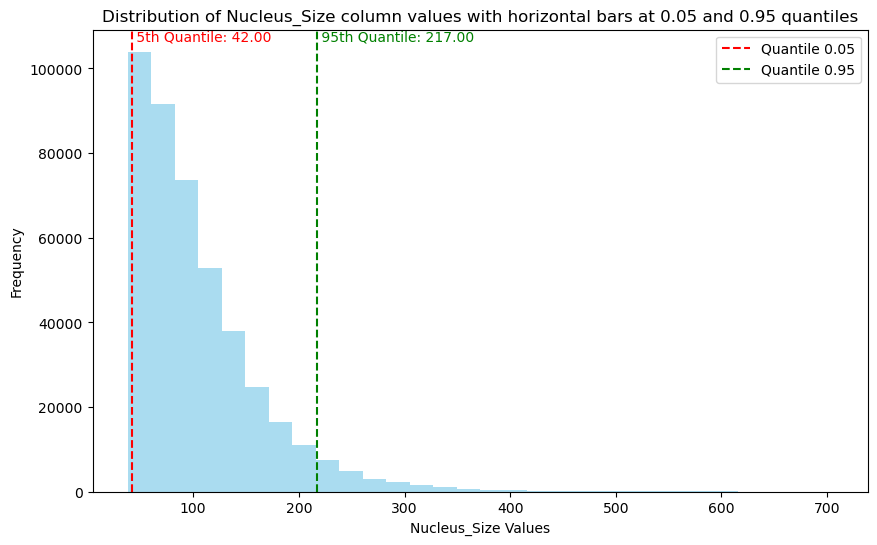

The plot is saved at: /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda/images/Nucleus_Size_Distribution.png


In [27]:
# Plot the distribution of the Nucleus_Size column
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['Nucleus_Size'], bins=30, alpha=0.7, color='skyblue')

# Add horizontal bars for the 0.05 and 0.95 quantiles
quantile_05 = df['Nucleus_Size'].quantile(0.05)
quantile_95 = df['Nucleus_Size'].quantile(0.95)
ax.axvline(x=quantile_05, color='r', linestyle='--', label='Quantile 0.05')
ax.axvline(x=quantile_95, color='g', linestyle='--', label='Quantile 0.95')

# Add titles and labels
ax.set_title('Distribution of Nucleus_Size column values with horizontal bars at 0.05 and 0.95 quantiles')
ax.set_xlabel('Nucleus_Size Values')
ax.set_ylabel('Frequency')
ax.legend()

# Display quantiles values
ax.text(quantile_05, ax.get_ylim()[1], f' 5th Quantile: {quantile_05:.2f}', color='r', verticalalignment='top')
ax.text(quantile_95, ax.get_ylim()[1], f' 95th Quantile: {quantile_95:.2f}', color='g', verticalalignment='top')

# Display the plot
plt.show()

# Save the plot in the output_images_dir directory using fig.savefig
plot_file_path = os.path.join(output_images_dir, "Nucleus_Size_Distribution.png")
fig.savefig(plot_file_path)
print(f"The plot is saved at: {plot_file_path}")

In [28]:
print(df["AF555_Cell_Intensity_Average"].quantile(q=qs))

0.05    1019.689148
0.50    1346.929932
0.95    2622.449524
Name: AF555_Cell_Intensity_Average, dtype: float64


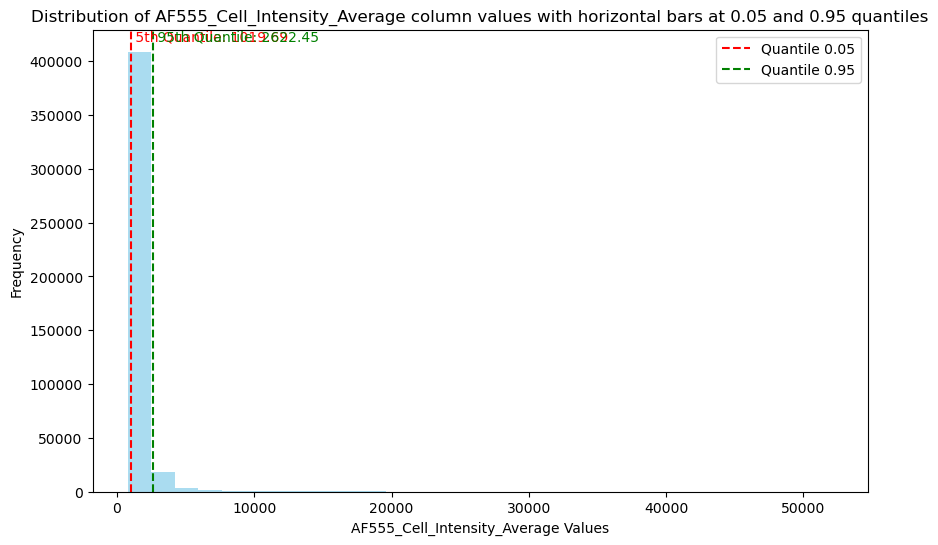

The plot is saved at: /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda/images/AF555_Cell_Intensity_Average_Distribution.png


In [29]:
# Plot the distribution of the Nucleus_Size column
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['AF555_Cell_Intensity_Average'], bins=30, alpha=0.7, color='skyblue')

# Add horizontal bars for the 0.05 and 0.95 quantiles
quantile_05 = df['AF555_Cell_Intensity_Average'].quantile(0.05)
quantile_95 = df['AF555_Cell_Intensity_Average'].quantile(0.95)
ax.axvline(x=quantile_05, color='r', linestyle='--', label='Quantile 0.05')
ax.axvline(x=quantile_95, color='g', linestyle='--', label='Quantile 0.95')

# Add titles and labels
ax.set_title('Distribution of AF555_Cell_Intensity_Average column values with horizontal bars at 0.05 and 0.95 quantiles')
ax.set_xlabel('AF555_Cell_Intensity_Average Values')
ax.set_ylabel('Frequency')
ax.legend()

# Display quantiles values
ax.text(quantile_05, ax.get_ylim()[1], f' 5th Quantile: {quantile_05:.2f}', color='r', verticalalignment='top')
ax.text(quantile_95, ax.get_ylim()[1], f' 95th Quantile: {quantile_95:.2f}', color='g', verticalalignment='top')

# Display the plot
plt.show()

# Save the plot in the output_images_dir directory using fig.savefig
plot_file_path = os.path.join(output_images_dir, "AF555_Cell_Intensity_Average_Distribution.png")
fig.savefig(plot_file_path)
print(f"The plot is saved at: {plot_file_path}")

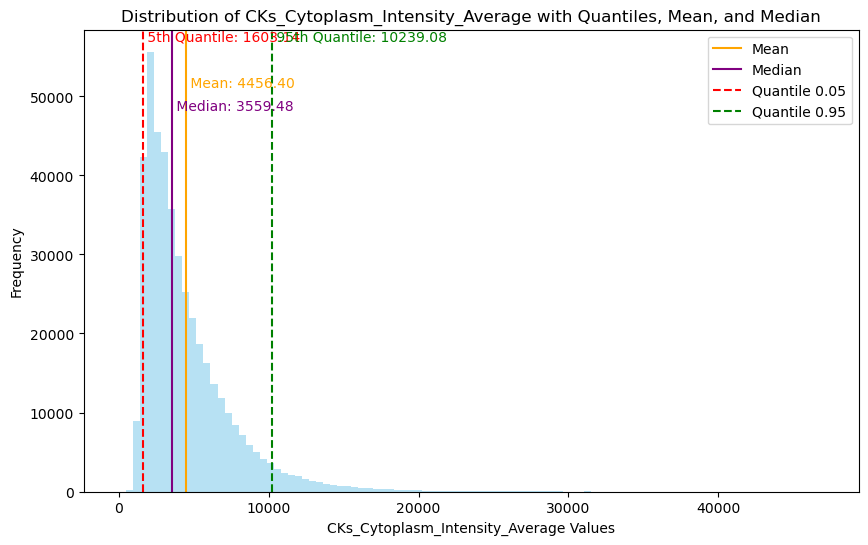

The plot is saved at: /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda/images/CKs_Cytoplasm_Intensity_Average_Distribution.png


In [30]:
# Plot the distribution of the Nucleus_Size column
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['CKs_Cytoplasm_Intensity_Average'], bins=100, alpha=0.6, color='skyblue')  # Augmented number of bins

# Calculate mean and median
mean_value = df['CKs_Cytoplasm_Intensity_Average'].mean()
median_value = df['CKs_Cytoplasm_Intensity_Average'].median()

# Add vertical lines for mean and median
ax.axvline(x=mean_value, color='orange', linestyle='-', label='Mean')
ax.axvline(x=median_value, color='purple', linestyle='-', label='Median')

# Add horizontal bars for the 0.05 and 0.95 quantiles
quantile_05 = df['CKs_Cytoplasm_Intensity_Average'].quantile(0.05)
quantile_95 = df['CKs_Cytoplasm_Intensity_Average'].quantile(0.95)
ax.axvline(x=quantile_05, color='r', linestyle='--', label='Quantile 0.05')
ax.axvline(x=quantile_95, color='g', linestyle='--', label='Quantile 0.95')

# Add titles and labels
ax.set_title('Distribution of CKs_Cytoplasm_Intensity_Average with Quantiles, Mean, and Median')
ax.set_xlabel('CKs_Cytoplasm_Intensity_Average Values')
ax.set_ylabel('Frequency')
ax.legend()

# Display quantile values
ax.text(quantile_05, ax.get_ylim()[1], f' 5th Quantile: {quantile_05:.2f}', color='r', verticalalignment='top')
ax.text(quantile_95, ax.get_ylim()[1], f' 95th Quantile: {quantile_95:.2f}', color='g', verticalalignment='top')

# Display mean and median values
ax.text(mean_value, ax.get_ylim()[1]*0.9, f' Mean: {mean_value:.2f}', color='orange', verticalalignment='top')
ax.text(median_value, ax.get_ylim()[1]*0.85, f' Median: {median_value:.2f}', color='purple', verticalalignment='top')

# Display the plot
plt.show()

# Save the plot
plot_file_path = os.path.join(output_images_dir, "CKs_Cytoplasm_Intensity_Average_Distribution.png")
fig.savefig(plot_file_path)
print(f"The plot is saved at: {plot_file_path}")

In [31]:
df["CKs_Cytoplasm_Intensity_Average"].quantile(q=qs)

0.05     1603.137970
0.50     3559.484741
0.95    10239.075195
Name: CKs_Cytoplasm_Intensity_Average, dtype: float64

## I.5. COLUMNS OF INTERESTS

In [32]:
# Remove columns containing "DAPI"
df = df[[x for x in df.columns.values if 'DAPI' not in x]]

print("Columns are now...")
print([c for c in df.columns.values])

Columns are now...
['ROI_index', 'Sample_ID', 'Nucleus_Roundness', 'Nucleus_Size', 'Nuc_X', 'Nuc_Y_Inv', 'Cell_Size', 'AF488_Cell_Intensity_Average', 'AF488_Cytoplasm_Intensity_Average', 'AF488_Nucleus_Intensity_Average', 'AF555_Cell_Intensity_Average', 'AF555_Cytoplasm_Intensity_Average', 'AF555_Nucleus_Intensity_Average', 'AF647_Cell_Intensity_Average', 'AF647_Cytoplasm_Intensity_Average', 'AF647_Nucleus_Intensity_Average', 'AF750_Cell_Intensity_Average', 'AF750_Cytoplasm_Intensity_Average', 'AF750_Nucleus_Intensity_Average', 'aSMA_Cell_Intensity_Average', 'aSMA_Cytoplasm_Intensity_Average', 'aSMA_Nucleus_Intensity_Average', 'AXL_Cell_Intensity_Average', 'AXL_Cytoplasm_Intensity_Average', 'AXL_Nucleus_Intensity_Average', 'B7H4_Cell_Intensity_Average', 'B7H4_Cytoplasm_Intensity_Average', 'B7H4_Nucleus_Intensity_Average', 'CA9_Cell_Intensity_Average', 'CA9_Cytoplasm_Intensity_Average', 'CA9_Nucleus_Intensity_Average', 'CD4_Cell_Intensity_Average', 'CD4_Cytoplasm_Intensity_Average', 'CD

In [33]:
# Create lists of full names and shortened names to use in plotting
full_to_short_names, short_to_full_names =  \
    shorten_feature_names(df.columns.values[~df.columns.isin(not_intensities)])

short_to_full_names

{'AF488_Cell': 'AF488_Cell_Intensity_Average',
 'AF488_Cytoplasm': 'AF488_Cytoplasm_Intensity_Average',
 'AF488_Nucleus': 'AF488_Nucleus_Intensity_Average',
 'AF555_Cell': 'AF555_Cell_Intensity_Average',
 'AF555_Cytoplasm': 'AF555_Cytoplasm_Intensity_Average',
 'AF555_Nucleus': 'AF555_Nucleus_Intensity_Average',
 'AF647_Cell': 'AF647_Cell_Intensity_Average',
 'AF647_Cytoplasm': 'AF647_Cytoplasm_Intensity_Average',
 'AF647_Nucleus': 'AF647_Nucleus_Intensity_Average',
 'AF750_Cell': 'AF750_Cell_Intensity_Average',
 'AF750_Cytoplasm': 'AF750_Cytoplasm_Intensity_Average',
 'AF750_Nucleus': 'AF750_Nucleus_Intensity_Average',
 'aSMA_Cell': 'aSMA_Cell_Intensity_Average',
 'aSMA_Cytoplasm': 'aSMA_Cytoplasm_Intensity_Average',
 'aSMA_Nucleus': 'aSMA_Nucleus_Intensity_Average',
 'AXL_Cell': 'AXL_Cell_Intensity_Average',
 'AXL_Cytoplasm': 'AXL_Cytoplasm_Intensity_Average',
 'AXL_Nucleus': 'AXL_Nucleus_Intensity_Average',
 'B7H4_Cell': 'B7H4_Cell_Intensity_Average',
 'B7H4_Cytoplasm': 'B7H4_Cytopl

In [34]:
# Save this data to a metadata file
filename = os.path.join(metadata_dir, "full_to_short_column_names.csv")
fh = open(filename, "w")
fh.write("full_name,short_name\n")
for k,v in full_to_short_names.items():
    fh.write(k + "," + v + "\n")
    
fh.close()
print("The full_to_short_column_names.csv file was created !")

The full_to_short_column_names.csv file was created !


In [35]:
# Save this data to a metadata file
filename = os.path.join(metadata_dir, "short_to_full_column_names.csv")
fh = open(filename, "w")
fh.write("short_name,full_name\n")
for k,v in short_to_full_names.items():
    fh.write(k + "," + v + "\n")
    
fh.close()
print("The short_to_full_column_names.csv file was created !")

The short_to_full_column_names.csv file was created !


## I.6. EXPOSURE TIME

In [36]:
# Here, we want to end up with a data structure that incorporates metadata on each intensity marker column used in our big dataframe in an easy-to-use format. 
# This is going to include the full name of the intensity marker columns in the big data frame, 
# the corresponding round and channel, 
# the target protein (e.g., CD45), 
# and the segmentation localization information (cell, cytoplasm, nucleus)

# We can use this data structure to assign unique colors to all channels and rounds, for example, for use in later visualizations
# Exposure_time file from ASHLAR analysis
filename = "Exposure_Time.csv"
filename = os.path.join(metadata_dir, filename)
exp_df = pd.read_csv(filename)

print(exp_df.head())

# Verify file imported correctly
# File length
print("df's shape: ", exp_df.shape)
# Headers
expected_headers =['Round','Target','Exp','Channel']
compare_headers(expected_headers, exp_df.columns.values, "Imported metadata file")

# Missingness
if exp_df.isnull().any().any():
    print("\nexp_df has null value(s) in row(s):")
    print(exp_df[exp_df.isna().any(axis=1)])
else:
    print("\nNo null values detected.")

  Round Target   Exp Channel
0    R0  AF488   300      c2
1    R0  AF555  1500      c3
2    R0  AF647  1500      c4
3    R0  AF750  1500      c5
4    R1  ColVI   300      c2
df's shape:  (36, 4)

No null values detected.


In [37]:
if len(exp_df['Target']) > len(exp_df['Target'].unique()):
    print("One or more non-unique Target values in exp_df. Currently not supported.")
exp_df = exp_df.drop_duplicates(subset = 'Target').reindex()

In [38]:
# sort exp_df by the values in the 'Target' column in ascending order and then retrieve the first few rows of the sorted df
exp_df.sort_values(by = ['Target']).head()

Round Target   Exp Channel
0     R0  AF488   300      c2
1     R0  AF555  1500      c3
2     R0  AF647  1500      c4
3     R0  AF750  1500      c5
17    R4    AXL  1500      c3

In [39]:
# Create lowercase version of target
exp_df['target_lower'] = exp_df['Target'].str.lower()
exp_df.head()

Round Target   Exp Channel target_lower
0    R0  AF488   300      c2        af488
1    R0  AF555  1500      c3        af555
2    R0  AF647  1500      c4        af647
3    R0  AF750  1500      c5        af750
4    R1  ColVI   300      c2        colvi

In [40]:
# Create df that contains marker intensity columns in our df that aren't in not_intensities
intensities = pd.DataFrame({'full_column':df.columns.values[~df.columns.isin(not_intensities)]})

intensities.head()

full_column
0       AF488_Cell_Intensity_Average
1  AF488_Cytoplasm_Intensity_Average
2    AF488_Nucleus_Intensity_Average
3       AF555_Cell_Intensity_Average
4  AF555_Cytoplasm_Intensity_Average

In [41]:
# Extract the marker information from the `full_column`, which corresponds to full column in big dataframe
# Use regular expressions (regex) to isolate the part of the field that begins (^) with an alphanumeric value (W), and ends with an underscore (_)
# '$' is end of line
intensities['marker'] = intensities['full_column'].str.extract(r'([^\W_]+)')
# convert to lowercase
intensities['marker_lower'] = intensities['marker'].str.lower()

intensities.head()

full_column marker marker_lower
0       AF488_Cell_Intensity_Average  AF488        af488
1  AF488_Cytoplasm_Intensity_Average  AF488        af488
2    AF488_Nucleus_Intensity_Average  AF488        af488
3       AF555_Cell_Intensity_Average  AF555        af555
4  AF555_Cytoplasm_Intensity_Average  AF555        af555

In [42]:
# Subset the intensities df to exclude any column pertaining to DAPI
intensities = intensities.loc[intensities['marker_lower'] != 'dapi']

intensities.head()

full_column marker marker_lower
0       AF488_Cell_Intensity_Average  AF488        af488
1  AF488_Cytoplasm_Intensity_Average  AF488        af488
2    AF488_Nucleus_Intensity_Average  AF488        af488
3       AF555_Cell_Intensity_Average  AF555        af555
4  AF555_Cytoplasm_Intensity_Average  AF555        af555

In [43]:
# Merge the intensities andexp_df together to create metadata
metadata = pd.merge(exp_df, intensities, how = 'left', left_on = 'target_lower',right_on = 'marker_lower')
metadata = metadata.drop(columns = ['marker_lower'])
metadata = metadata.dropna()

# Target is the capitalization from the Exposure_Time.csv
# target_lower is Target in small caps
# marker is the extracted first component of the full column in segmentation data, with corresponding capitalization
metadata

Round Target   Exp Channel target_lower  \
0      R0  AF488   300      c2        af488   
1      R0  AF488   300      c2        af488   
2      R0  AF488   300      c2        af488   
3      R0  AF555  1500      c3        af555   
4      R0  AF555  1500      c3        af555   
..    ...    ...   ...     ...          ...   
103    R8  Sting  1000      c4        sting   
104    R8  Sting  1000      c4        sting   
105    R8  CD11b  1500      c5        cd11b   
106    R8  CD11b  1500      c5        cd11b   
107    R8  CD11b  1500      c5        cd11b   

                           full_column marker  
0         AF488_Cell_Intensity_Average  AF488  
1    AF488_Cytoplasm_Intensity_Average  AF488  
2      AF488_Nucleus_Intensity_Average  AF488  
3         AF555_Cell_Intensity_Average  AF555  
4    AF555_Cytoplasm_Intensity_Average  AF555  
..                                 ...    ...  
103  Sting_Cytoplasm_Intensity_Average  Sting  
104    Sting_Nucleus_Intensity_Average  Sting  
105       CD11b_Cell_Intensity_Average  CD11b  
106  CD11b_Cytoplasm_Intensity_Average  CD11b  
107    CD11b_Nucleus_Intensity_Average  CD11b  

[108 rows x 7 columns]

In [44]:
# Add a column to signify marker target localisation.
# Use a lambda to determine segmented location of intensity marker column and update metadata accordingly
# Using the add_metadata_location() function in my_modules.py
metadata['localisation'] = metadata.apply(
    lambda row: add_metadata_location(row), axis = 1)

metadata

Round Target   Exp Channel target_lower  \
0      R0  AF488   300      c2        af488   
1      R0  AF488   300      c2        af488   
2      R0  AF488   300      c2        af488   
3      R0  AF555  1500      c3        af555   
4      R0  AF555  1500      c3        af555   
..    ...    ...   ...     ...          ...   
103    R8  Sting  1000      c4        sting   
104    R8  Sting  1000      c4        sting   
105    R8  CD11b  1500      c5        cd11b   
106    R8  CD11b  1500      c5        cd11b   
107    R8  CD11b  1500      c5        cd11b   

                           full_column marker localisation  
0         AF488_Cell_Intensity_Average  AF488         cell  
1    AF488_Cytoplasm_Intensity_Average  AF488    cytoplasm  
2      AF488_Nucleus_Intensity_Average  AF488      nucleus  
3         AF555_Cell_Intensity_Average  AF555         cell  
4    AF555_Cytoplasm_Intensity_Average  AF555    cytoplasm  
..                                 ...    ...          ...  
103  Sting_Cytoplasm_Intensity_Average  Sting    cytoplasm  
104    Sting_Nucleus_Intensity_Average  Sting      nucleus  
105       CD11b_Cell_Intensity_Average  CD11b         cell  
106  CD11b_Cytoplasm_Intensity_Average  CD11b    cytoplasm  
107    CD11b_Nucleus_Intensity_Average  CD11b      nucleus  

[108 rows x 8 columns]

In [45]:
# Save this data structure to the metadata folder
# don't want to add color in because that's better off treating color the same for round, channel, and sample
filename = "marker_intensity_metadata.csv"
filename = os.path.join(metadata_dir, filename)

metadata.to_csv(filename, index = False)
print("The marker_intensity_metadata.csv file was created !")

The marker_intensity_metadata.csv file was created !


## I.7. COLORS WORKFLOW

### I.7.1. CHANNELS COLORS

Unique channels are: ['c2' 'c3' 'c4' 'c5']


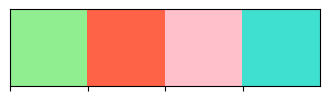

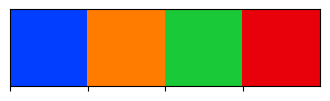

In [46]:
# we want colors that are categorical, since Channel is a non-ordered category (yes, they are numbered, but arbitrarily). 
# A categorical color palette will have dissimilar colors.
# Get those unique colors
if len(metadata.Channel.unique()) > 10:
    print("WARNING: There are more unique channel values than \
    there are colors to choose from. Select different palette, e.g., \
    continuous palette 'husl'.")
channel_color_values = sb.color_palette("bright",n_colors = len(metadata.Channel.unique()))
# chose 'colorblind' because it is categorical and we're unlikely to have > 10

# You can customize the colors for each channel here
custom_colors = {
    'c2': 'lightgreen',
    'c3': 'tomato',
    'c4': 'pink',
    'c5': 'turquoise'
}

custom_colors_values = sb.palplot(sb.color_palette([custom_colors.get(ch, 'blue') for ch in metadata.Channel.unique()]))

# Display those unique customs colors
print("Unique channels are:", metadata.Channel.unique())
sb.palplot(sb.color_palette(channel_color_values))

In [47]:
# Store in a dictionary
channel_color_dict = dict(zip(metadata.Channel.unique(), channel_color_values))
channel_color_dict
for k,v in channel_color_dict.items():
    channel_color_dict[k] = np.float64(v)

channel_color_dict

{'c2': array([0.00784314, 0.24313725, 1.        ]),
 'c3': array([1.        , 0.48627451, 0.        ]),
 'c4': array([0.10196078, 0.78823529, 0.21960784]),
 'c5': array([0.90980392, 0.        , 0.04313725])}

In [65]:
color_df_channel = color_dict_to_df(channel_color_dict, "Channel")

# Save to file in metadatadirectory
filename = "channel_color_data.csv"
filename = os.path.join(metadata_dir, filename)
color_df_channel.to_csv(filename, index = False)

color_df_channel

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
# Legend of channel info only
g  = plt.figure(figsize = (1,1)).add_subplot(111)
g.axis('off')
handles = []
for item in channel_color_dict.keys():
        h = g.bar(0,0, color = channel_color_dict[item],
                  label = item, linewidth =0)
        handles.append(h)
first_legend = plt.legend(handles=handles, loc='upper right', title = 'Channel'),
                            # bbox_to_anchor=(10,10), 
                             #       bbox_transform=plt.gcf().transFigure)

filename = "Channel_legend.png"
filename = os.path.join(metadata_images_dir, filename)
plt.savefig(filename, bbox_inches = 'tight')

### I.7.2. ROUNDS COLORS

['R0' 'R1' 'R2' 'R3' 'R4' 'R5' 'R6' 'R7' 'R8']


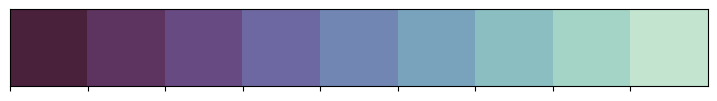

In [49]:
# we want colors that are sequential, since Round is an ordered category. 
# We can still generate colors that are easy to distinguish. Also, many of the categorical palettes cap at at about 10 or so unique colors, and repeat from there. 
# We do not want any repeats!
round_color_values = sb.cubehelix_palette(
    len(metadata.Round.unique()), start=1, rot= -0.75, dark=0.19, light=.85, reverse=True)
# round_color_values = sb.color_palette("cubehelix",n_colors = len(metadata.Round.unique()))
# chose 'cubehelix' because it is sequential, and round is a continuous process
# each color value is a tuple of three values: (R, G, B)
print(metadata.Round.unique())

sb.palplot(sb.color_palette(round_color_values))

## TO-DO: write what these parameters mean

In [50]:
# Store in a dictionary
round_color_dict = dict(zip(metadata.Round.unique(), round_color_values))

for k,v in round_color_dict.items():
    round_color_dict[k] = np.float64(v)

round_color_dict

{'R0': array([0.28685356, 0.13009829, 0.23110332]),
 'R1': array([0.36541462, 0.2025447 , 0.3769331 ]),
 'R2': array([0.40867533, 0.29407612, 0.51667119]),
 'R3': array([0.42890614, 0.40822902, 0.63353489]),
 'R4': array([0.44444629, 0.5264665 , 0.70563219]),
 'R5': array([0.47707206, 0.64270618, 0.74184779]),
 'R6': array([0.54144549, 0.74667592, 0.75729058]),
 'R7': array([0.64147101, 0.83215511, 0.7746773 ]),
 'R8': array([0.76842569, 0.89926671, 0.81713833])}

In [51]:
color_df_round = color_dict_to_df(round_color_dict, "Round")

# Save to file in metadatadirectory
filename = "round_color_data.csv"
filename = os.path.join(metadata_dir, filename)
color_df_round.to_csv(filename, index = False)

color_df_round

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

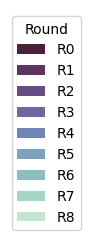

In [52]:
# Legend of round info only

round_legend  = plt.figure(figsize = (1,1)).add_subplot(111)
round_legend.axis('off')
handles = []
for item in round_color_dict.keys():
        h = round_legend.bar(0,0, color = round_color_dict[item],
                  label = item, linewidth =0)
        handles.append(h)
first_legend = plt.legend(handles=handles, loc='upper right', title = 'Round'),
                            # bbox_to_anchor=(10,10), 
                             #       bbox_transform=plt.gcf().transFigure)

filename = "Round_legend.png"
filename = os.path.join(metadata_images_dir, filename)
plt.savefig(filename, bbox_inches = 'tight')

### I.7.3. SAMPLES COLORS

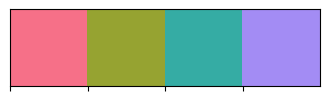

In [53]:
# we want colors that are neither sequential nor categorical. 
# Categorical would be ideal if we could generate an arbitrary number of colors, but I do not think that we can. 
# Hense, we will choose `n` colors from a continuous palette. First we will generate the right number of colors. Later, we will assign TMA samples to gray.

# Get those unique colors
color_values = sb.color_palette("husl",n_colors = len(ls_samples))#'HLS'
# each color value is a tuple of three values: (R, G, B)

# Display those unique colors
sb.palplot(sb.color_palette(color_values))

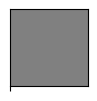

In [54]:
TMA_samples = [s for s in df.Sample_ID.unique() if 'TMA' in s]
TMA_color_values = sb.color_palette(n_colors = len(TMA_samples),palette = "gray")
sb.palplot(sb.color_palette(TMA_color_values))

In [55]:
# Store in a dictionary
color_dict = dict()
color_dict = dict(zip(df.Sample_ID.unique(), color_values))

# Replace all TMA samples' colors with gray
i = 0
for key in color_dict.keys():
    if 'TMA' in key:
        color_dict[key] = TMA_color_values[i]
        i +=1

color_dict

{'DD3S1.csv': (0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 'DD3S2.csv': (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 'DD3S3.csv': (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 'TMA.csv': (0.5019607843137255, 0.5019607843137255, 0.5019607843137255)}

In [56]:
color_df_sample = color_dict_to_df(color_dict, "Sample_ID")

# Save to file in metadatadirectory
filename = "sample_color_data.csv"
filename = os.path.join(metadata_dir, filename)
color_df_sample.to_csv(filename, index = False)

color_df_sample

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

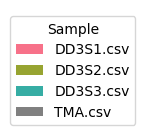

In [57]:
# Legend of sample info only
g  = plt.figure(figsize = (1,1)).add_subplot(111)
g.axis('off')
handles = []
for item in color_dict.keys():
        h = g.bar(0,0, color = color_dict[item],
                  label = item, linewidth =0)
        handles.append(h)
first_legend = plt.legend(handles=handles, loc='upper right', title = 'Sample')

filename = "Sample_legend.png"
filename = os.path.join(metadata_images_dir, filename)
plt.savefig(filename, bbox_inches = 'tight')

### I.7.4. CLUSTERS COLORS

In [58]:
if 'cluster' in df.columns:
    cluster_color_values = sb.color_palette("hls",n_colors = len(df.cluster.unique()))

    print(sorted(test_df.cluster.unique()))
    # Display those unique colors
    sb.palplot(sb.color_palette(cluster_color_values))
    
    cluster_color_dict = dict(zip(sorted(test_df.cluster.unique()), cluster_color_values))
    print(cluster_color_dict)
    
    # Create dataframe
    cluster_color_df = color_dict_to_df(cluster_color_dict, "cluster")
    cluster_color_df.head()

    # Save to file in metadatadirectory
    filename = "cluster_color_data.csv"
    filename = os.path.join(metadata_dir, filename)
    cluster_color_df.to_csv(filename, index = False)

In [59]:
# Legend of cluster info only

if 'cluster' in df.columns:
    g  = plt.figure(figsize = (1,1)).add_subplot(111)
    g.axis('off')
    handles = []
    for item in sorted(cluster_color_dict.keys()):
            h = g.bar(0,0, color = cluster_color_dict[item],
                      label = item, linewidth =0)
            handles.append(h)
    first_legend = plt.legend(handles=handles, loc='upper right', title = 'Cluster'),


    filename = "Clustertype_legend.png"
    filename = os.path.join(metadata_images_dir, filename)
    plt.savefig(filename, bbox_inches = 'tight')

In [60]:
# Add in the color information in both RGB (range 0-1) and hex values, for use in visualizations
metadata['round_color'] = metadata.apply(lambda row: round_color_dict[row['Round']], axis = 1)
metadata['channel_color'] = metadata.apply(lambda row: channel_color_dict[row['Channel']], axis = 1)

metadata

Round Target   Exp Channel target_lower  \
0      R0  AF488   300      c2        af488   
1      R0  AF488   300      c2        af488   
2      R0  AF488   300      c2        af488   
3      R0  AF555  1500      c3        af555   
4      R0  AF555  1500      c3        af555   
..    ...    ...   ...     ...          ...   
103    R8  Sting  1000      c4        sting   
104    R8  Sting  1000      c4        sting   
105    R8  CD11b  1500      c5        cd11b   
106    R8  CD11b  1500      c5        cd11b   
107    R8  CD11b  1500      c5        cd11b   

                           full_column marker localisation  \
0         AF488_Cell_Intensity_Average  AF488         cell   
1    AF488_Cytoplasm_Intensity_Average  AF488    cytoplasm   
2      AF488_Nucleus_Intensity_Average  AF488      nucleus   
3         AF555_Cell_Intensity_Average  AF555         cell   
4    AF555_Cytoplasm_Intensity_Average  AF555    cytoplasm   
..                                 ...    ...          ...   
103  Sting_Cytoplasm_Intensity_Average  Sting    cytoplasm   
104    Sting_Nucleus_Intensity_Average  Sting      nucleus   
105       CD11b_Cell_Intensity_Average  CD11b         cell   
106  CD11b_Cytoplasm_Intensity_Average  CD11b    cytoplasm   
107    CD11b_Nucleus_Intensity_Average  CD11b      nucleus   

                                           round_color  \
0    [0.28685356234627135, 0.13009829239513535, 0.2...   
1    [0.28685356234627135, 0.13009829239513535, 0.2...   
2    [0.28685356234627135, 0.13009829239513535, 0.2...   
3    [0.28685356234627135, 0.13009829239513535, 0.2...   
4    [0.28685356234627135, 0.13009829239513535, 0.2...   
..                                                 ...   
103  [0.7684256891219349, 0.8992667116749021, 0.817...   
104  [0.7684256891219349, 0.8992667116749021, 0.817...   
105  [0.7684256891219349, 0.8992667116749021, 0.817...   
106  [0.7684256891219349, 0.8992667116749021, 0.817...   
107  [0.7684256891219349, 0.8992667116749021, 0.817...   

                                         channel_color  
0      [0.00784313725490196, 0.24313725490196078, 1.0]  
1      [0.00784313725490196, 0.24313725490196078, 1.0]  
2      [0.00784313725490196, 0.24313725490196078, 1.0]  
3                      [1.0, 0.48627450980392156, 0.0]  
4                      [1.0, 0.48627450980392156, 0.0]  
..                                                 ...  
103  [0.10196078431372549, 0.788235294117647, 0.219...  
104  [0.10196078431372549, 0.788235294117647, 0.219...  
105    [0.9098039215686274, 0.0, 0.043137254901960784]  
106    [0.9098039215686274, 0.0, 0.043137254901960784]  
107    [0.9098039215686274, 0.0, 0.043137254901960784]  

[108 rows x 10 columns]

## I.8. SAVE

In [61]:
overwrite_all = input("Do you want to overwrite all existing files without confirmation? (yes/no): ")
overwrite_all = overwrite_all.lower().strip()

for sample in ls_samples:
    sample_id = sample.split('.csv')[0]
    filename = os.path.join(output_data_dir, sample_id + "_" + step_suffix + ".csv")
    if os.path.exists(filename):
        if overwrite_all == 'yes':
            df_save = df.loc[df['Sample_ID'] == sample, :]
            df_save.to_csv(filename, index=True, index_label='ID', mode='w')  # 'mode='w'' overwrites the file
            print("File " + filename + " was overwritten!")
        else:
            user_response = input("File by name " + filename + " already exists. Do you want to overwrite it? (yes/no): ")
            if user_response.lower().strip() == 'yes':
                df_save = df.loc[df['Sample_ID'] == sample, :]
                df_save.to_csv(filename, index=True, index_label='ID', mode='w')  # 'mode='w'' overwrites the file
                print("File " + filename + " was overwritten!")
            else:
                print("File was not overwritten. Moving to the next sample.")
    else:
        df_save = df.loc[df['Sample_ID'] == sample, :]
        df_save.to_csv(filename, index=True, index_label='ID')  # Save normally if the file doesn't exist
        print("File " + filename + " was created and saved !")


Do you want to overwrite all existing files without confirmation? (yes/no): n
File by name /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda/DD3S1_qc_eda.csv already exists. Do you want to overwrite it? (yes/no): n
File was not overwritten. Moving to the next sample.
File by name /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda/DD3S2_qc_eda.csv already exists. Do you want to overwrite it? (yes/no): n
File was not overwritten. Moving to the next sample.
File by name /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda/DD3S3_qc_eda.csv already exists. Do you want to overwrite it? (yes/no): n
File was not overwritten. Moving to the next sample.
File by name /Users/harshithakolipaka/Downloads/wetransfer_data-zip_2024-05-17_1431/test_qc_eda/TMA_qc_eda.csv already exists. Do you want to overwrite it? (yes/no): n
File was not overwritten. Moving to the next sample.
